In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(20, 10)})

In [2]:
df = pd.read_csv('../data/Modelar_UH2021.txt', sep="|", decimal = ",")
#df = pd.read_csv('Modelar_UH2021.txt', sep="|", decimal = ",")

In [3]:
df.head()

,fecha,id,visitas,categoria_uno,categoria_dos,estado,precio,dia_atipico,campaña,antiguedad,unidades_vendidas
0,1/6/2015 0:00:00,21972,0,C,75.0,No Rotura,NaN,0,0,5241.0,0
1,1/6/2015 0:00:00,23910,5,C,170.0,No Rotura,6.07,0,0,5241.0,3
2,1/6/2015 0:00:00,24306,13,A,46.0,No Rotura,NaN,0,0,NaN,0
3,1/6/2015 0:00:00,24306,13,A,46.0,No Rotura,NaN,0,0,NaN,0
4,1/6/2015 0:00:00,27144,15,E,230.0,No Rotura,NaN,0,0,4064.0,0


In [4]:
df.shape

(4045022, 11)

In [5]:
df.dtypes

fecha                 object
id                     int64
visitas                int64
categoria_uno         object
categoria_dos        float64
estado                object
precio               float64
dia_atipico            int64
campaña                int64
antiguedad           float64
unidades_vendidas      int64
dtype: object

Vamos a cambiar los tipos de datos de las columnas para poder tratarlos en un futuro.

In [6]:
df[['categoria_uno', 'estado']] = df[['categoria_uno', 'estado']].astype(str)
df['fecha'] = pd.to_datetime(df['fecha'])

print(df.dtypes)
df.head()


fecha                datetime64[ns]
id                            int64
visitas                       int64
categoria_uno                object
categoria_dos               float64
estado                       object
precio                      float64
dia_atipico                   int64
campaña                       int64
antiguedad                  float64
unidades_vendidas             int64
dtype: object


,fecha,id,visitas,categoria_uno,categoria_dos,estado,precio,dia_atipico,campaña,antiguedad,unidades_vendidas
0,2015-01-06,21972,0,C,75.0,No Rotura,NaN,0,0,5241.0,0
1,2015-01-06,23910,5,C,170.0,No Rotura,6.07,0,0,5241.0,3
2,2015-01-06,24306,13,A,46.0,No Rotura,NaN,0,0,NaN,0
3,2015-01-06,24306,13,A,46.0,No Rotura,NaN,0,0,NaN,0
4,2015-01-06,27144,15,E,230.0,No Rotura,NaN,0,0,4064.0,0


Buscamos valores null en las columnas que forman el conjunto de datos.

In [7]:
missing_columns = df.columns[df.isna().any()].tolist()
missing_columns

['categoria_dos', 'precio', 'antiguedad']

Podemos observar que hay tres columnas con valores nulos. Ahora lo que vamos a hacer es ver con cuántos valores nulos cuenta cada una de ellas y de esta manera, decidir de qué forma tratarlos.

In [8]:
missing_data = df.isnull() # Los valores null se representan como True

for column in missing_columns:
    print(column)
    print (missing_data[column].value_counts())
    print("")

categoria_dos
False    4039178
True        5844
Name: categoria_dos, dtype: int64

precio
True     2642911
False    1402111
Name: precio, dtype: int64

antiguedad
False    3170857
True      874165
Name: antiguedad, dtype: int64



Cantidad de valores null por columna:
* `categoria_dos`: 5844
* `precio`: 2642911
* `antiguedad`: 874165

Para tratar los valores nulos de la columna `categoria_dos` vamos a reemplazarlos por el valor más frecuente de esta:

In [9]:
most_freq = df['categoria_dos'].mode().values[0]
most_freq

307.0

In [10]:
df['categoria_dos'].replace(np.nan, most_freq, inplace=True)

Para tratar los valores nulos de la columna `precio` vamos a realizar lo que se indica en las instrucciones del reto "*Cuando su valor es nulo, ha de ser completado con el precio anterior temporalmente más cercano para cada artículo.*"

In [11]:
# def nearest(items, pivot):
#     return min([i for i in items if i < pivot], key=lambda x: abs(x - pivot))

In [12]:
# Hay que encontrar la fila con NaN en precio. Coger su id y buscar las filas con el mismo id. Buscar la fecha anterior mas cercana y poner su precio

# DataFrame con las filas que no tienen precio
""" precio_nan = df[['fecha','id','precio']].where(df['precio'].isnull()).dropna(how='all')
precio_nan['fecha'] = pd.to_datetime(precio_nan['fecha'])
print(precio_nan)

# DataFrame con las filas que tienen precio
precio_not_nan = df[['fecha','id','precio']].dropna()
precio_not_nan['fecha'] = pd.to_datetime(precio_not_nan['fecha'])
print(precio_not_nan)

for index, row in precio_nan.iterrows():
    # Filas con precio que tienen el mismo id que la que no tiene precio
    aux1 = precio_not_nan.where(precio_not_nan['id'] == row['id']).dropna(how='all')
    print('Fecha escogida: ')
    print(row['fecha'])

    # Se anade una columna con la diferencia entre las fechas de la fila
    # que estamos mirando sin precio y las que tienen precio
    # Mirar si puede dar negativo
    # aux1['diferencia'] = (row['fecha'] - aux1['fecha']).dt.days
    
    fecha_anterior = aux1['fecha'].where(aux1['fecha'] < row['fecha']).dropna(how='all')
    print('--------------------------')
    print(fecha_anterior)
    
    print('Fecha anterior mas reciente: ')    
    print(aux1['fecha'].truncate(before=str(row['fecha'])).head())
     """
    
    # Seleccionamos la menor 


" precio_nan = df[['fecha','id','precio']].where(df['precio'].isnull()).dropna(how='all')\nprecio_nan['fecha'] = pd.to_datetime(precio_nan['fecha'])\nprint(precio_nan)\n\n# DataFrame con las filas que tienen precio\nprecio_not_nan = df[['fecha','id','precio']].dropna()\nprecio_not_nan['fecha'] = pd.to_datetime(precio_not_nan['fecha'])\nprint(precio_not_nan)\n\nfor index, row in precio_nan.iterrows():\n    # Filas con precio que tienen el mismo id que la que no tiene precio\n    aux1 = precio_not_nan.where(precio_not_nan['id'] == row['id']).dropna(how='all')\n    print('Fecha escogida: ')\n    print(row['fecha'])\n\n    # Se anade una columna con la diferencia entre las fechas de la fila\n    # que estamos mirando sin precio y las que tienen precio\n    # Mirar si puede dar negativo\n    # aux1['diferencia'] = (row['fecha'] - aux1['fecha']).dt.days\n    \n    fecha_anterior = aux1['fecha'].where(aux1['fecha'] < row['fecha']).dropna(how='all')\n    print('--------------------------')\n  

Para tratar los valores nulos de la columna `antiguedad` vamos a reemplazarlos por la media de esta columna:
(La categoria 2 esta relacionada con categoria 1 entonces rellenar por la media segun categoria 1) (Categoria 2 con null, buscar su categoria 1 y encontrar la media de categoria 2 para la categoria 1)

In [13]:
mean_val = int(df['antiguedad'].mean())
mean_val

1011

In [14]:
df['antiguedad'].replace(np.nan, mean_val, inplace=True)

Aquí podemos visualizar las ventas por meses para poder distinguir si hay una diferencia notoria de ventas entre ellos

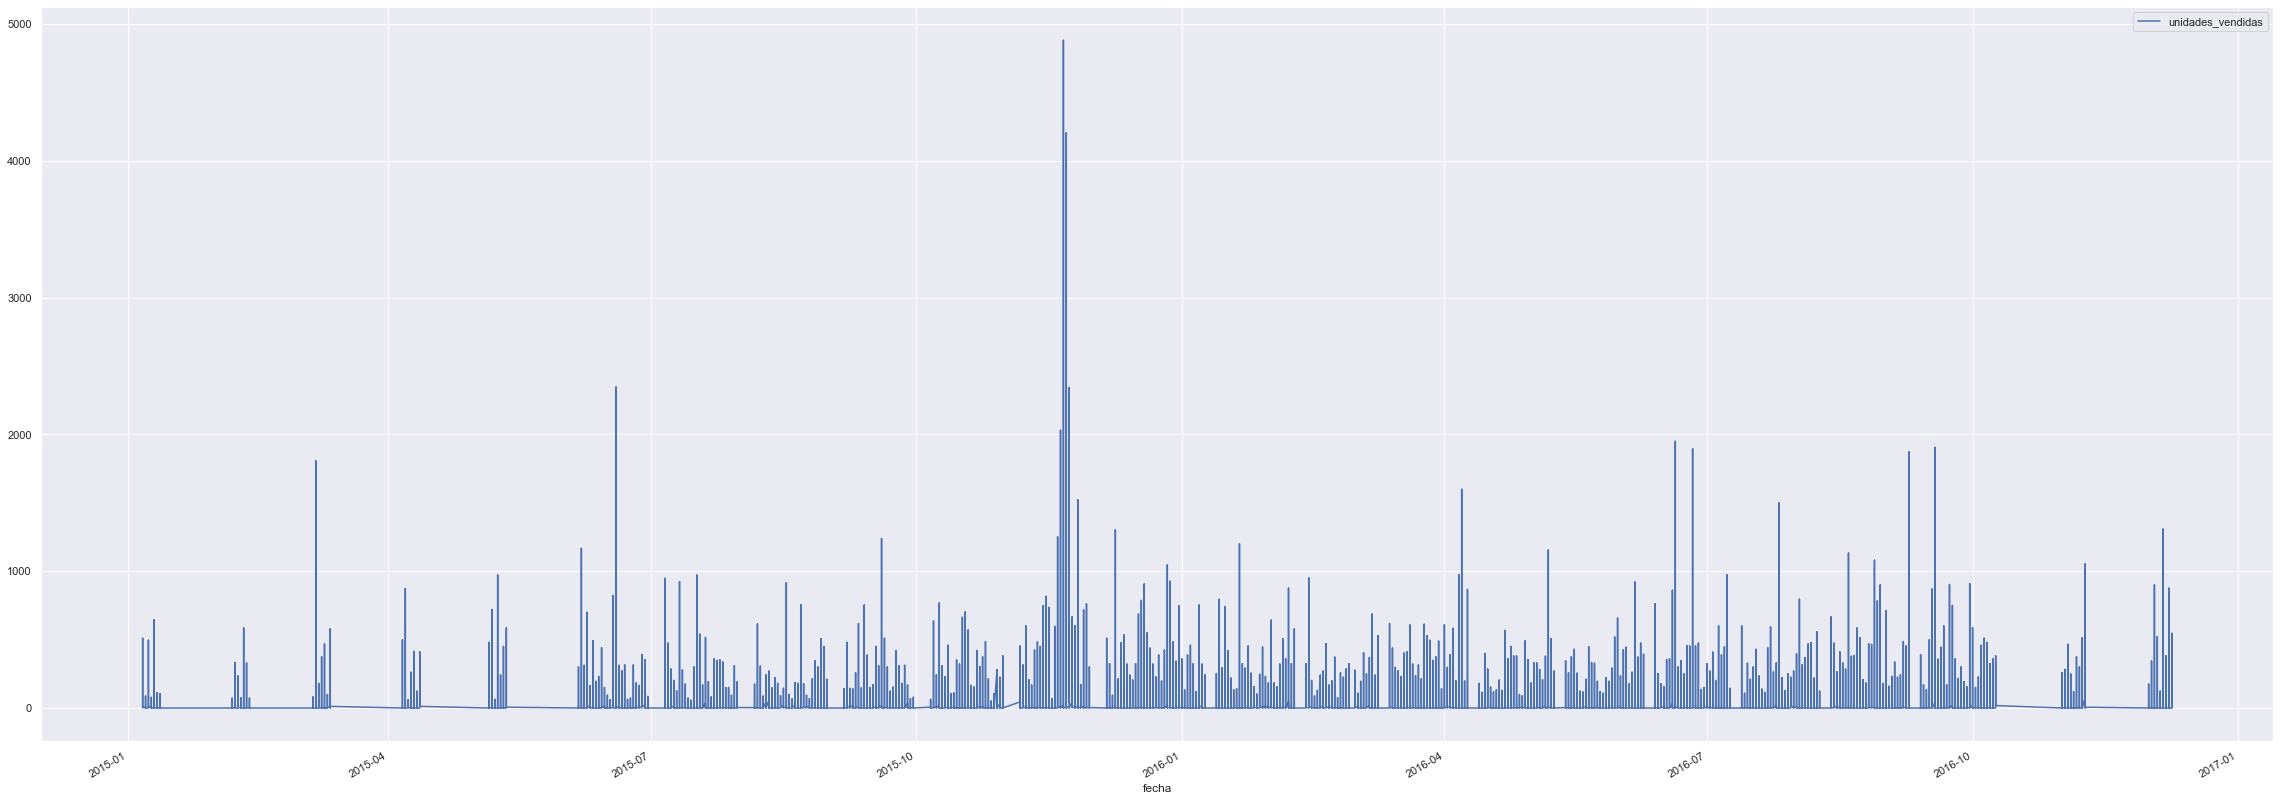

In [15]:
df[['fecha','unidades_vendidas']].set_index('fecha').plot(figsize=(40,15))

Vamos a observar una visión generalizada de la relación entre variables, teniendo en cuenta nuestra variable a predecir. Esto nos ayudará a saber en qué atributos centrarnos y cuál es la manera en la que se relacionan.

In [16]:
""" df_correlacion = df.drop(["id", "categoria_dos", "dia_atipico", "campaña"], axis=1)
sns.pairplot(df_correlacion, hue = "unidades_vendidas", diag_kind = "hist", corner = True, palette="viridis") """

' df_correlacion = df.drop(["id", "categoria_dos", "dia_atipico", "campaña"], axis=1)\nsns.pairplot(df_correlacion, hue = "unidades_vendidas", diag_kind = "hist", corner = True, palette="viridis") '

Podemos observar varias cosas gracias a esta visión general:

*   Existe una tendencia clara entre "precio" y "antigüedad", en la que cuando esta última disminuye, así lo hace también el precio.

*   Podemos observar otra tendencia igual de clara entre las variables "visitas" y "antigüedad", donde a mayor antiguedad de producto, menores visitas encontramos.

Pero lo que realmente nos interesa es cómo estas relaciones afectan a las unidades vendidas, que es nuestra variable a predecir. La conclusión que podemos sacar lógica y que se confirma en los gráficos que observamos arriba es:

*   Cuanto menor es el precio y la antigüedad, las unidades vendidas se incrementan de manera notoria.

Esta relación resulta muy importante a la hora de realizar una predicción. No obstante, respecto a la segunda tendencia que hemos observado antes, existe una relación no tan lógica como la anterior y es que:

*   Cuanto más nuevo y más visitas tenga el producto, no siempre se vende más. De hecho, la mayoría de las unidades vendidas se centran en la franja entre las 0 y las 1000 visitas, siempre y cuando el producto sea novedoso.

Esto también es un factor importante a tener en cuenta en un futuro.





1.   **CATEGORIA_UNO**

---





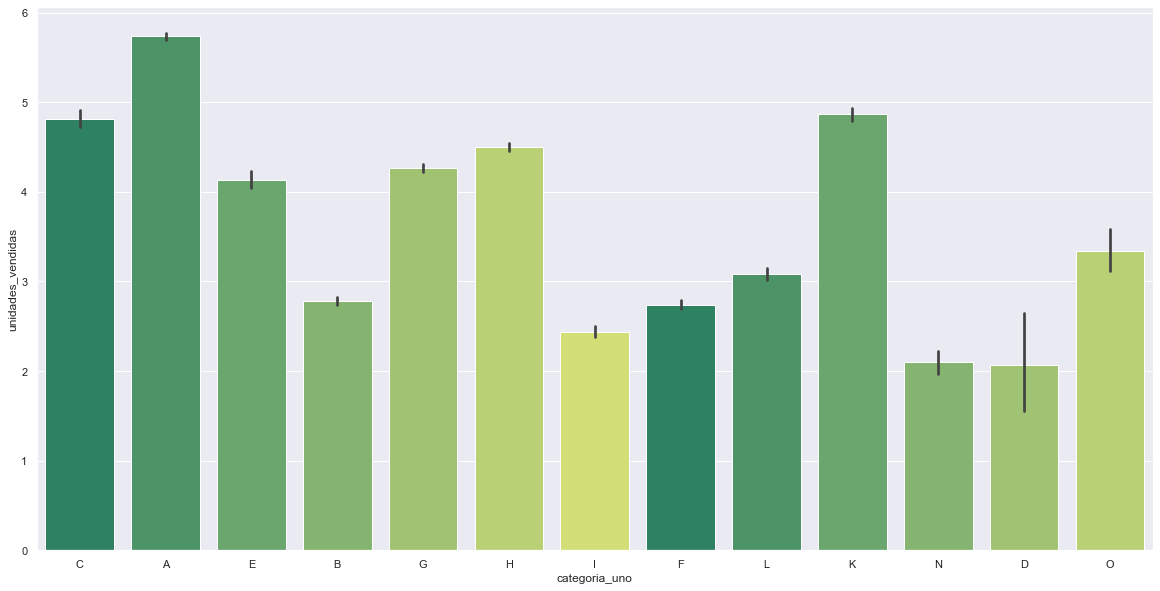

In [17]:
sns.barplot(x="categoria_uno", y="unidades_vendidas", data=df, palette=sns.color_palette("summer", 7))

2. **CATEGORIA_DOS**

---



In [18]:
""" aux = df.drop(["id", "campaña", "precio", "antiguedad", "visitas", "dia_atipico", "fecha"], axis=1)
df_melted = aux.melt("categoria_uno", var_name = "a", value_name = "b")
print(df_melted)
sns.barplot(x="categoria_uno", y="b", data=df_melted, palette=sns.color_palette("summer", 7)) """

         categoria_uno                  a    b
0                    C      categoria_dos   75
1                    C      categoria_dos  170
2                    A      categoria_dos   46
3                    A      categoria_dos   46
4                    E      categoria_dos  230
...                ...                ...  ...
12135061             F  unidades_vendidas    9
12135062             F  unidades_vendidas    0
12135063             K  unidades_vendidas    0
12135064             K  unidades_vendidas   24
12135065             K  unidades_vendidas   24

[12135066 rows x 3 columns]


TypeError: Neither the `x` nor `y` variable appears to be numeric.

3. **CAMPAÑA**

---



In [20]:
sns.barplot(x="campaña", y="unidades_vendidas", data=df, palette=sns.color_palette("summer", 7), estimator=sum)

KeyboardInterrupt: 

In [38]:
test = df[['campaña', 'unidades_vendidas']].where(df['campaña'] == 0).dropna(how='all')
test['unidades_vendidas'].sum()

18332325.0